<a href="https://colab.research.google.com/github/alfianimran/Shipping_Supply_Chain/blob/master/Supply_Chain_for_Shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
DataSet = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [3]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


In [4]:
Dataset.info()

NameError: ignored

In [5]:
ItemCount = DataSet["Country"].value_counts().nlargest(10)

print("Top 10 Countries Wise Count")
print(ItemCount)

Top 10 Countries Wise Count
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


In [6]:
DataSet.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
DataSet.dropna()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,60,5513,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

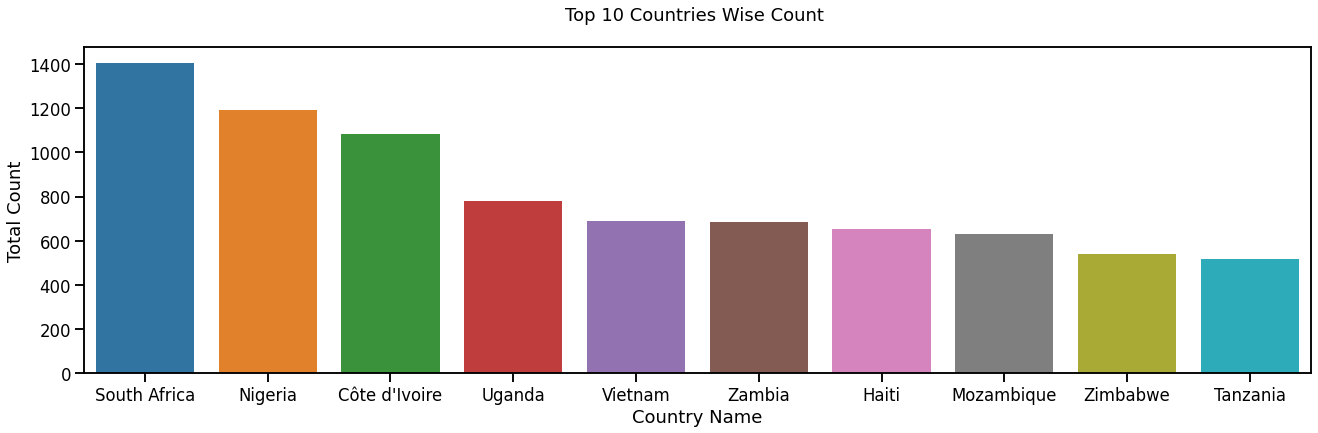

In [10]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [11]:
DataSet['Scheduled Delivery Date']  = pd.to_datetime(DataSet['Scheduled Delivery Date']) 
DataSet['Delivered to Client Date']  = pd.to_datetime(DataSet['Delivered to Client Date']) 
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 9964 non-null   object        
 10  PQ First Sent to Client Date  10324 non-null  object        
 11  PO Sent to Vendor Date      

In [12]:
DataSet['Delivery_Delay'] = DataSet['Delivered to Client Date'] - DataSet['Scheduled Delivery Date']
DataSet['Delivery_Delay'] = DataSet['Delivery_Delay'].dt.days
DataSet['Delivery_Delay']

0         0
1         0
2         0
3         0
4         0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 10324, dtype: int64

In [13]:
DataSet.groupby('Country')['Delivery_Delay'].mean().sort_values(ascending = False).reset_index()

,Country,Delivery_Delay
0,"Congo, DRC",11.240240
1,Togo,5.333333
2,Benin,2.384615
3,Senegal,1.000000
4,Kenya,0.891892
5,Afghanistan,0.000000
6,Kazakhstan,0.000000
7,Sierra Leone,0.000000
8,Pakistan,0.000000
9,Mali,0.000000


Total Pack Price for Top 15 Countries

Country
Nigeria          25620.72
South Africa     24318.90
Côte d'Ivoire    22882.35
Haiti            19521.30
Uganda           15664.08
Mozambique       14092.40
Vietnam          11963.78
Zambia           11889.67
Tanzania         11047.72
Rwanda            7724.29
Botswana          7052.54
Zimbabwe          6563.56
Kenya             6349.14
Congo, DRC        6032.41
Guyana            5659.35
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

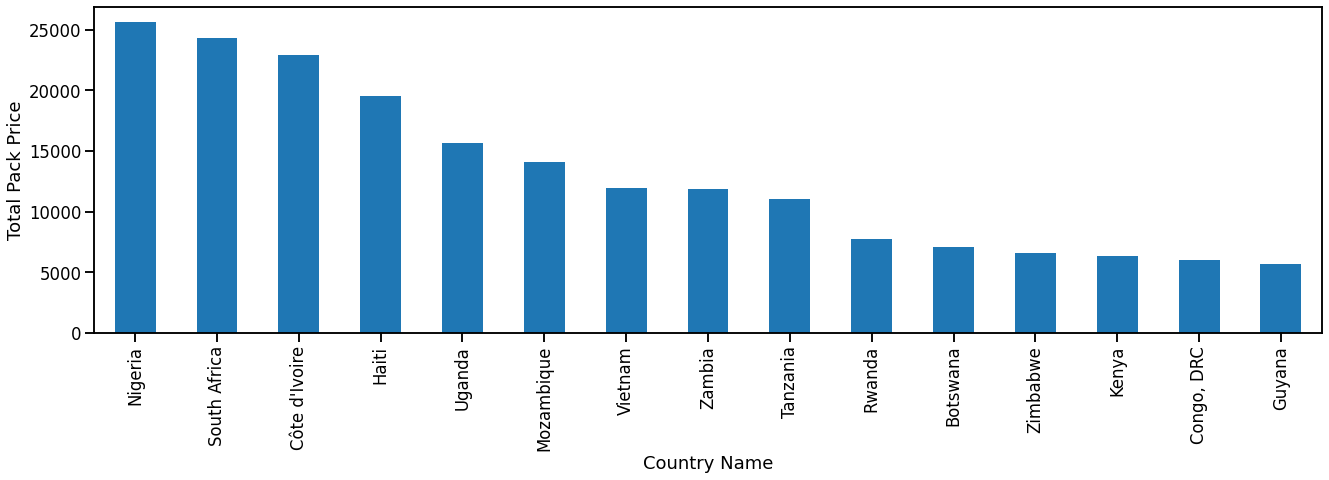

In [14]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Line Designation')

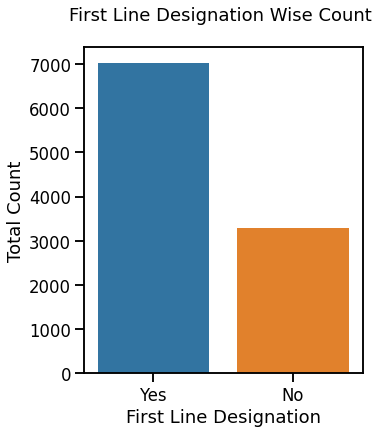

In [15]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sns.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [16]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

In [17]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'MSD South Granville Australia' "ABBVIE (Abbott) St. P'burg USA"
 'ABBVIE Ludwigshafen Germany' 'Trinity Biotech, Plc'
 'EY Laboratories, USA' 'Cipla, Goa, India' 'BMS Meymac, France'
 'Premier Med. Corp Ltd. India' 'Chembio Diagnostics Sys. Inc.'
 'Inverness Japan' 'Pacific Biotech, Thailand'
 'Standard Diagnostics, Korea' 'GSK Mississauga (Canada)'
 'Gilead(Nycomed) Oranienburg DE' 'Bio-Rad Laboratories'
 'Mylan (formerly Matrix) Nashik' 'Roche Basel' 'GSK Ware (UK)'
 'Novartis Pharma AG, Switzerland' 'BI, Ingelheim, Germany'
 'Not Applicable' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'GSK Aranda'
 'Hetero Unit III Hyderabad IN' 'ABBVIE (Abbott) France'
 'Strides, Bangalore, India.' 'ABBSP' 'Cipla, Patalganga, India'
 'GSK Cape Tow

In [18]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 1
The Mean Air Shipment is : 82.34


Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

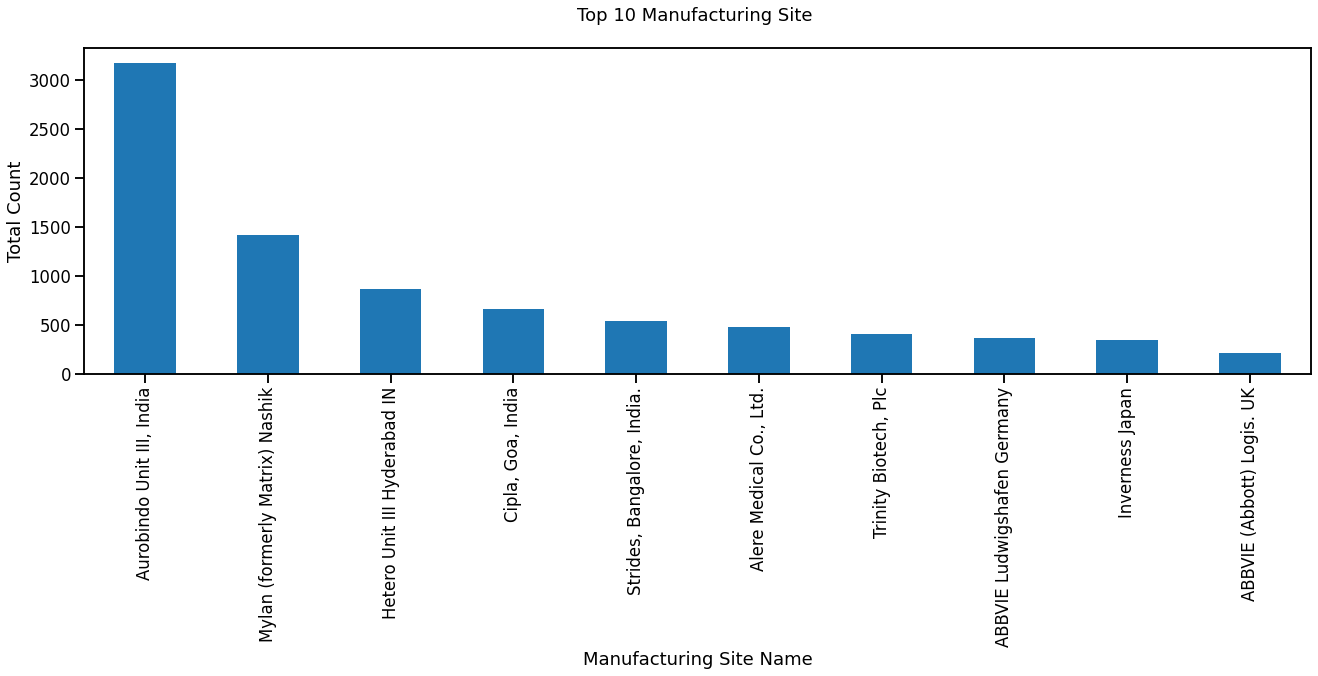

In [19]:
TopTenManufacturingSite = DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopTenManufacturingSite)

plt.figure(figsize=(22,6))
TopTenManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
ABBVIE (Abbott) Logis. UK          150
Name: Manufacturing Site, dtype: int64


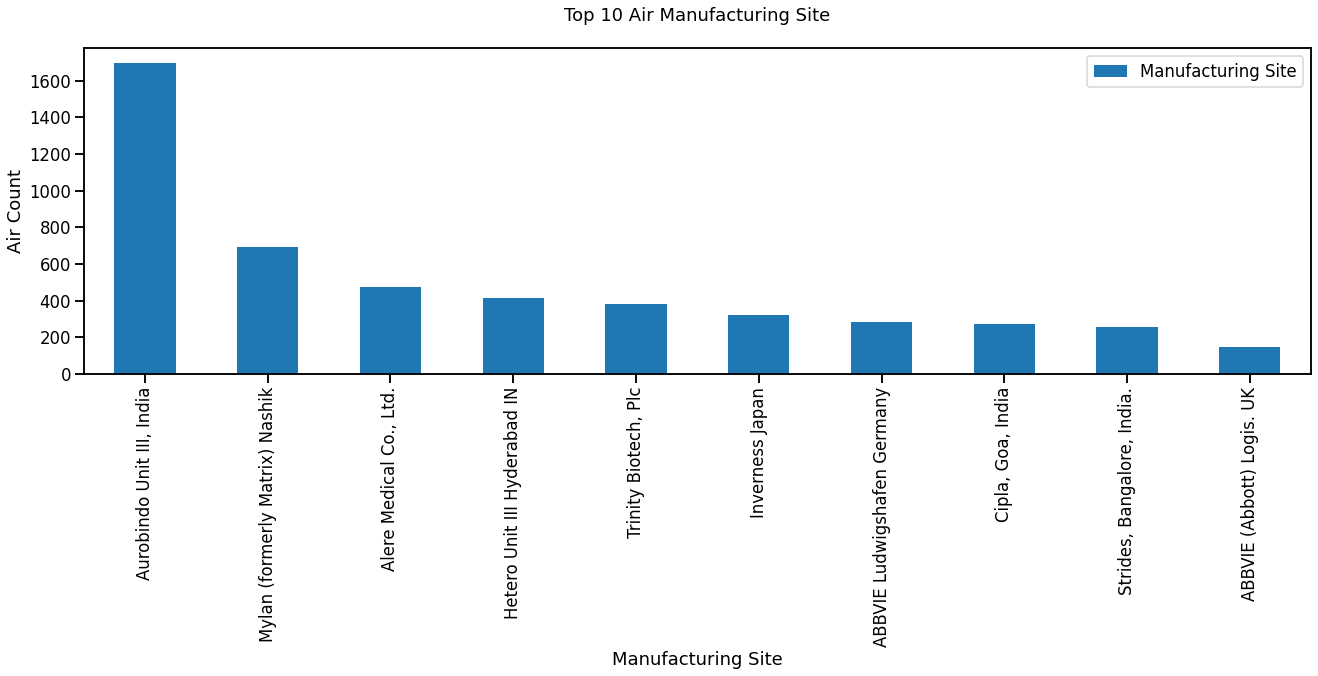

In [20]:
ItemData = DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))

plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



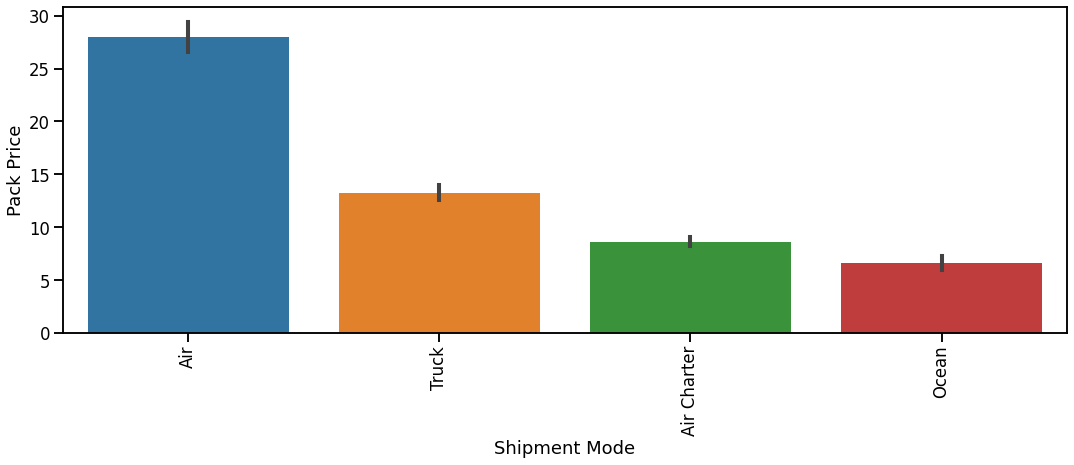

In [22]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = DataSet)
plt.show()